<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Make-the-surface-flux-interactive-and-add-subsidence" data-toc-modified-id="Make-the-surface-flux-interactive-and-add-subsidence-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Make the surface flux interactive and add subsidence</a></span></li></ul></div>

# Make the surface flux interactive and add subsidence

In [1]:
def theta_ft(h,intercept,gamma):
    theta_top = intercept + h*gamma
    return theta_top

from collections import namedtuple
def make_tuple(tupname,in_dict):
    the_tup = namedtuple(tupname, in_dict.keys())
    the_tup = the_tup(**in_dict)
    return the_tup


In [2]:
import numpy as np
import scipy.integrate as integrate
from matplotlib import pyplot as plt
import pandas as pd



def dmixed_vars(the_vars,tstep,coeffs):
    """
      the_vars[0]= thetabar
      the_vars[1] = h
      
      surface flux from drag law with subsidense and diagnosed deltheta
    """
    #print('the_vars: ',the_vars,D,U)
    k=0.2
    deltheta = theta_ft(the_vars[1],coeffs.intercept,coeffs.gamma) - the_vars[0]
    Cd = 1.e-3
    F0 = coeffs.U*Cd*(coeffs.sst - the_vars[0])
    Fint = -k*F0
    went = -Fint/deltheta
    wsubs = -coeffs.D*the_vars[1]
    rho=1.
    cp=1004.
    derivs=np.empty_like(the_vars)
    derivs[0]=(F0 - Fint)/(the_vars[1]*rho) - 0./1004./the_vars[1]
    derivs[1] = went + wsubs
    return derivs

In [3]:
dtout=15.  #minutes
tf=15*24.   #hours
dtout=dtout*60. #seconds
tf=tf*3600. #seconds
sst=310.
D=5.e-6  #s-1
U=7  #m/s
intercept = 292 #K
gamma = 6.e-3  #K/m
tspan = np.arange(0.,tf,dtout)
vars_init=[288.,400.]  #theta (K), height (m) to start
the_tup=dict(D=D,U=U,sst=sst,intercept=intercept,gamma=gamma)
the_tup=make_tuple('coeffs',the_tup)
output=integrate.odeint(dmixed_vars, vars_init, tspan,(the_tup,))
result=pd.DataFrame.from_records(output,columns=['theta','h'])
result['time']=tspan/3600./24.  #days
result['deltheta'] = theta_ft(result['h'].values,intercept,gamma) - result['theta']

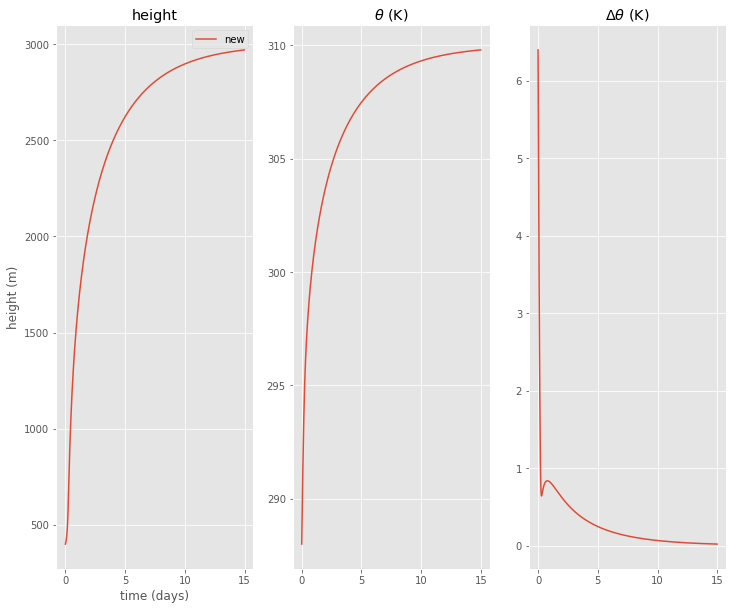

In [4]:
%matplotlib inline
plt.close('all')
plt.style.use('ggplot')
fig,ax = plt.subplots(1,3,figsize=(12,10))
ax[0].plot(result['time'],result['h'],label='new')
ax[0].set(ylabel='height (m)',xlabel='time (days)',title='height')
ax[0].legend(loc='best')
ax[1].plot(result['time'],result['theta'],label='new')
out=ax[1].set(title=r'$\theta$ (K)')
out=ax[2].plot(result['time'],result['deltheta'],label='new')
out=ax[2].set(title=r'$\Delta \theta$ (K)')